In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df =  pd.read_csv(r'C:\Users\lenovo\Desktop\Notebooks\DATA\cluster_mpg.csv')

In [4]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    object 
 8   name          392 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 27.7+ KB


In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mpg,392.0,23.445918,7.805007,9.0,17.000,22.75,29.000,46.6
cylinders,392.0,5.471939,1.705783,3.0,4.000,4.00,8.000,8.0
displacement,392.0,194.411990,104.644004,68.0,105.000,151.00,275.750,455.0
horsepower,392.0,104.469388,38.491160,46.0,75.000,93.50,126.000,230.0
weight,392.0,2977.584184,849.402560,1613.0,2225.250,2803.50,3614.750,5140.0
acceleration,392.0,15.541327,2.758864,8.0,13.775,15.50,17.025,24.8
model_year,392.0,75.979592,3.683737,70.0,73.000,76.00,79.000,82.0


In [7]:
df_w_dummies = pd.get_dummies(df.drop('name',axis=1))

In [8]:
df_w_dummies

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_europe,origin_japan,origin_usa
0,18.0,8,307.0,130.0,3504,12.0,70,False,False,True
1,15.0,8,350.0,165.0,3693,11.5,70,False,False,True
2,18.0,8,318.0,150.0,3436,11.0,70,False,False,True
3,16.0,8,304.0,150.0,3433,12.0,70,False,False,True
4,17.0,8,302.0,140.0,3449,10.5,70,False,False,True
...,...,...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86.0,2790,15.6,82,False,False,True
388,44.0,4,97.0,52.0,2130,24.6,82,True,False,False
389,32.0,4,135.0,84.0,2295,11.6,82,False,False,True
390,28.0,4,120.0,79.0,2625,18.6,82,False,False,True


In [9]:
from sklearn.preprocessing import MinMaxScaler

In [10]:
scaler = MinMaxScaler()

In [11]:
scaled_df = scaler.fit_transform(df_w_dummies)

In [12]:
scaled_df

array([[0.2393617 , 1.        , 0.61757106, ..., 0.        , 0.        ,
        1.        ],
       [0.15957447, 1.        , 0.72868217, ..., 0.        , 0.        ,
        1.        ],
       [0.2393617 , 1.        , 0.64599483, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.61170213, 0.2       , 0.17312661, ..., 0.        , 0.        ,
        1.        ],
       [0.50531915, 0.2       , 0.13436693, ..., 0.        , 0.        ,
        1.        ],
       [0.58510638, 0.2       , 0.13178295, ..., 0.        , 0.        ,
        1.        ]])

In [15]:
df_scaled = pd.DataFrame(scaled_df,columns= df_w_dummies.columns)

<Axes: >

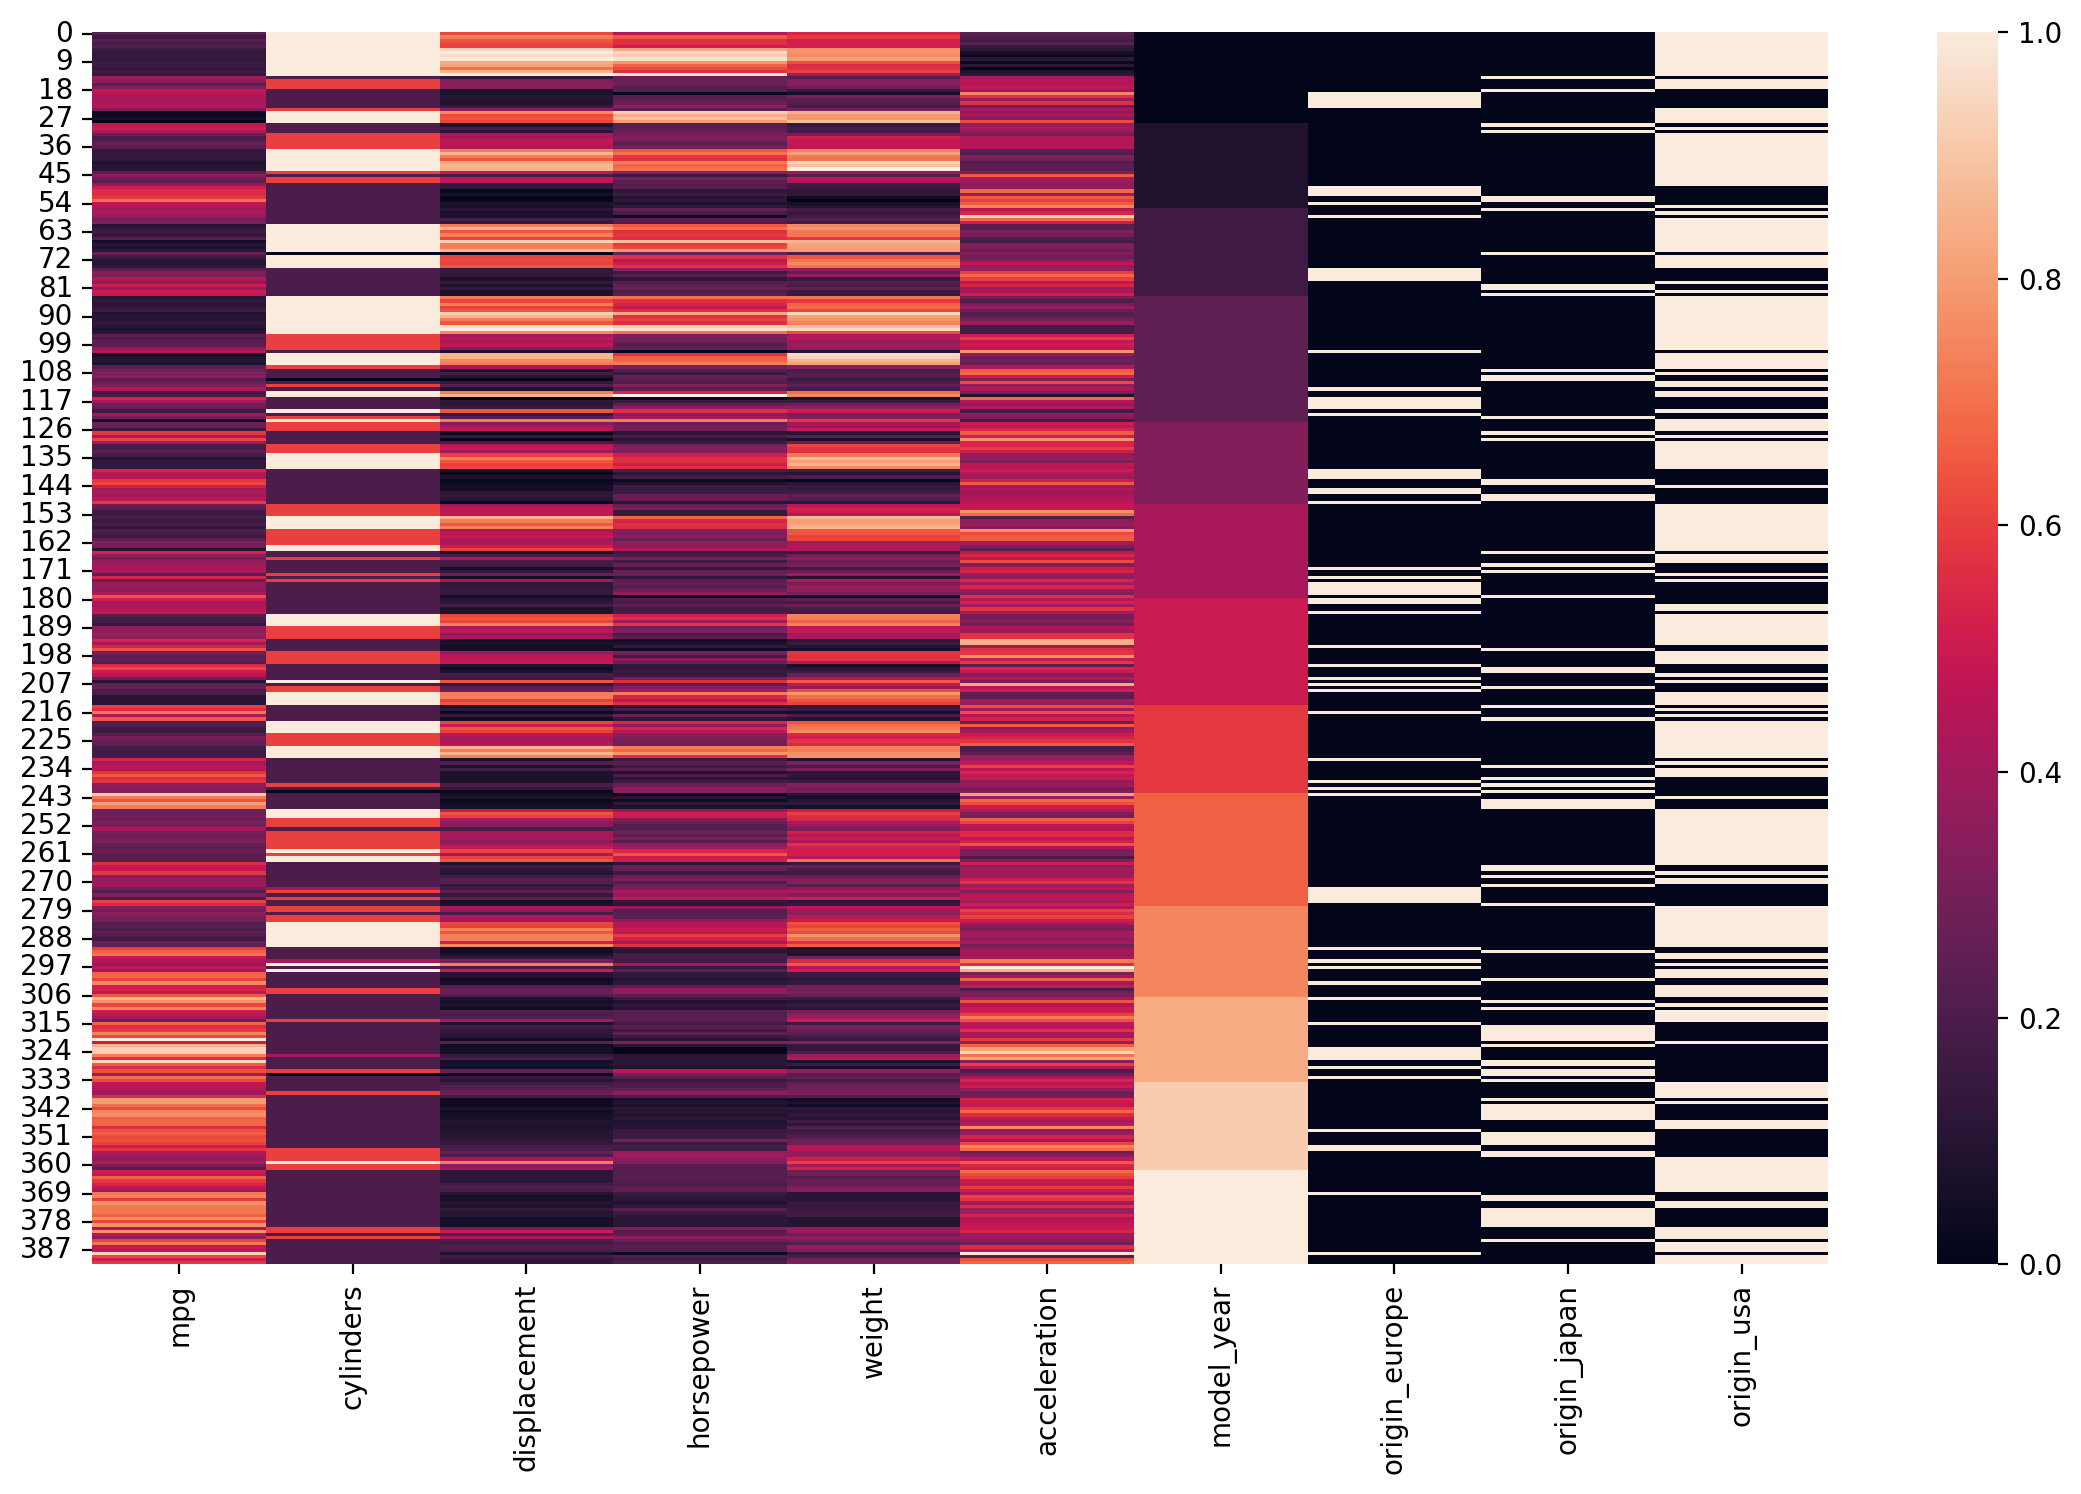

In [16]:
plt.figure(figsize=(14,8),dpi=200)
sns.heatmap(data=df_scaled)

<Figure size 2800x1600 with 0 Axes>

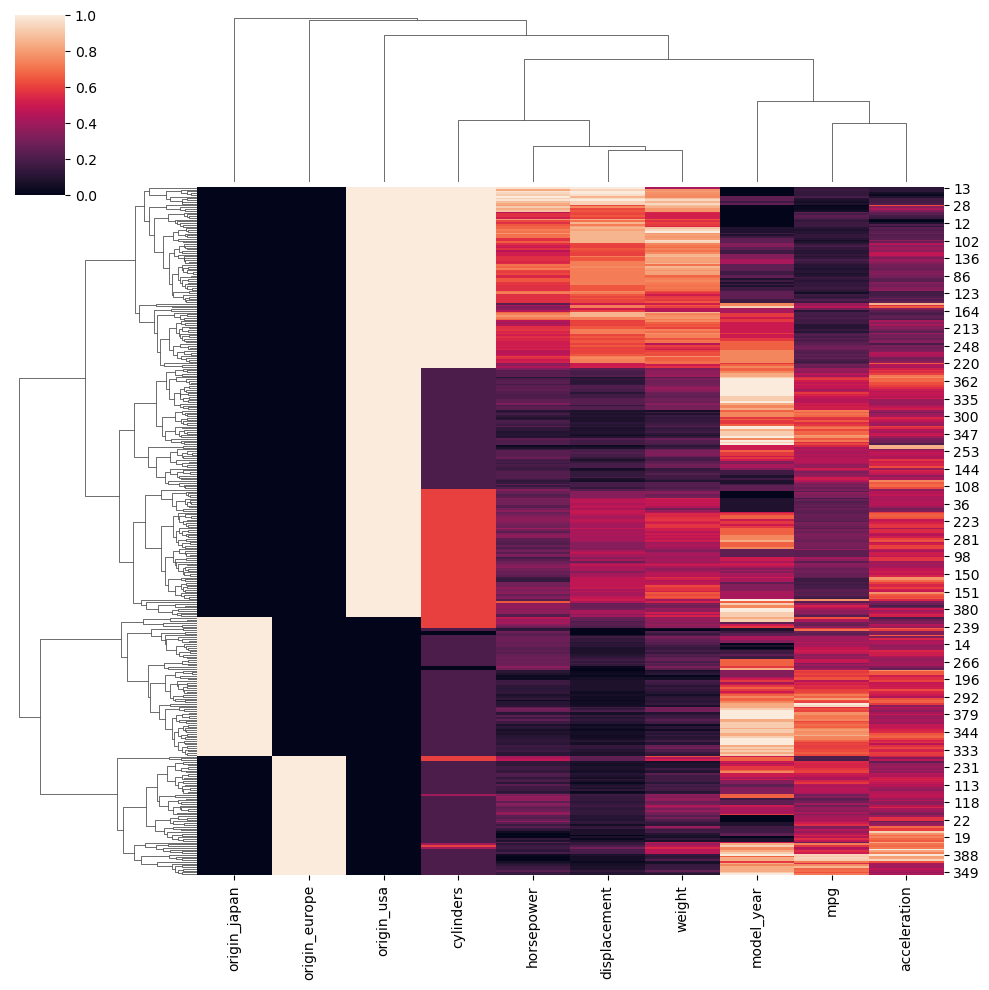

In [17]:
plt.figure(figsize=(14,8),dpi=200)
sns.clustermap(data=df_scaled)

<Figure size 2800x1600 with 0 Axes>

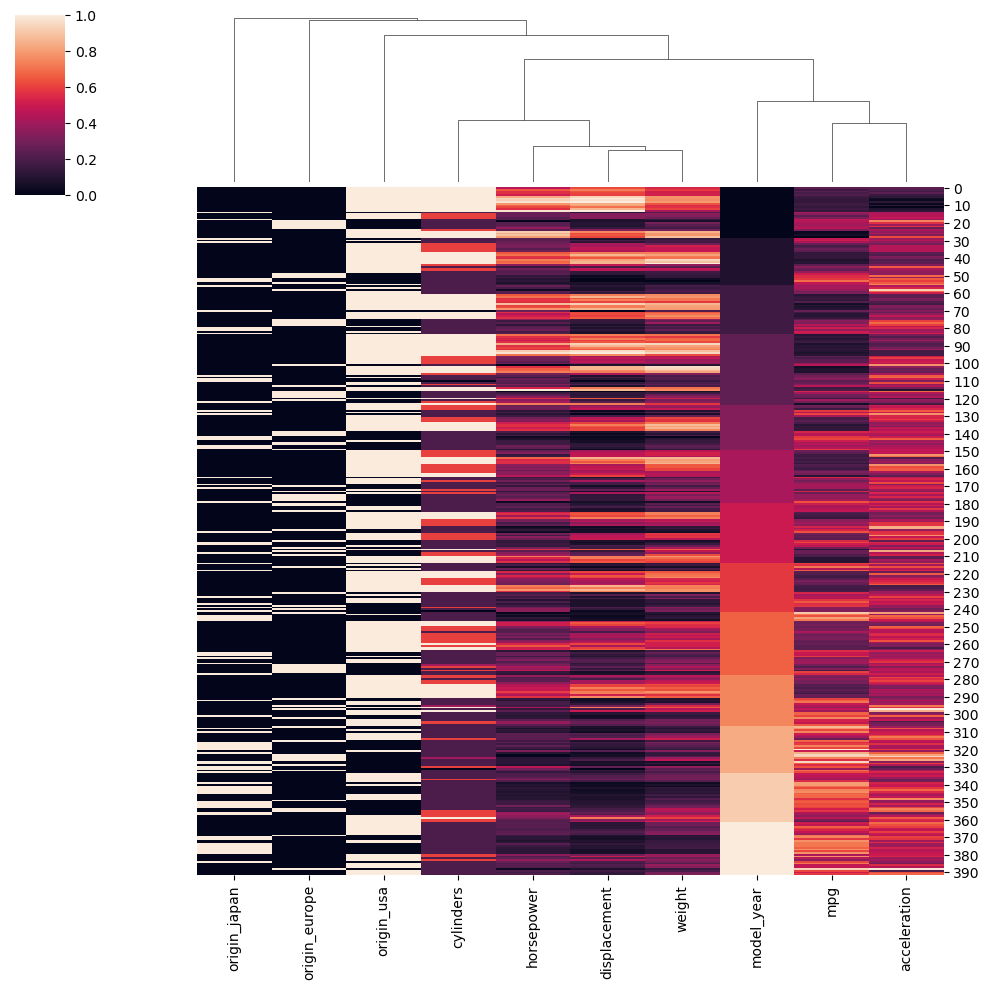

In [18]:
plt.figure(figsize=(14,8),dpi=200)
sns.clustermap(data=df_scaled,row_cluster=False)

<Figure size 2800x1600 with 0 Axes>

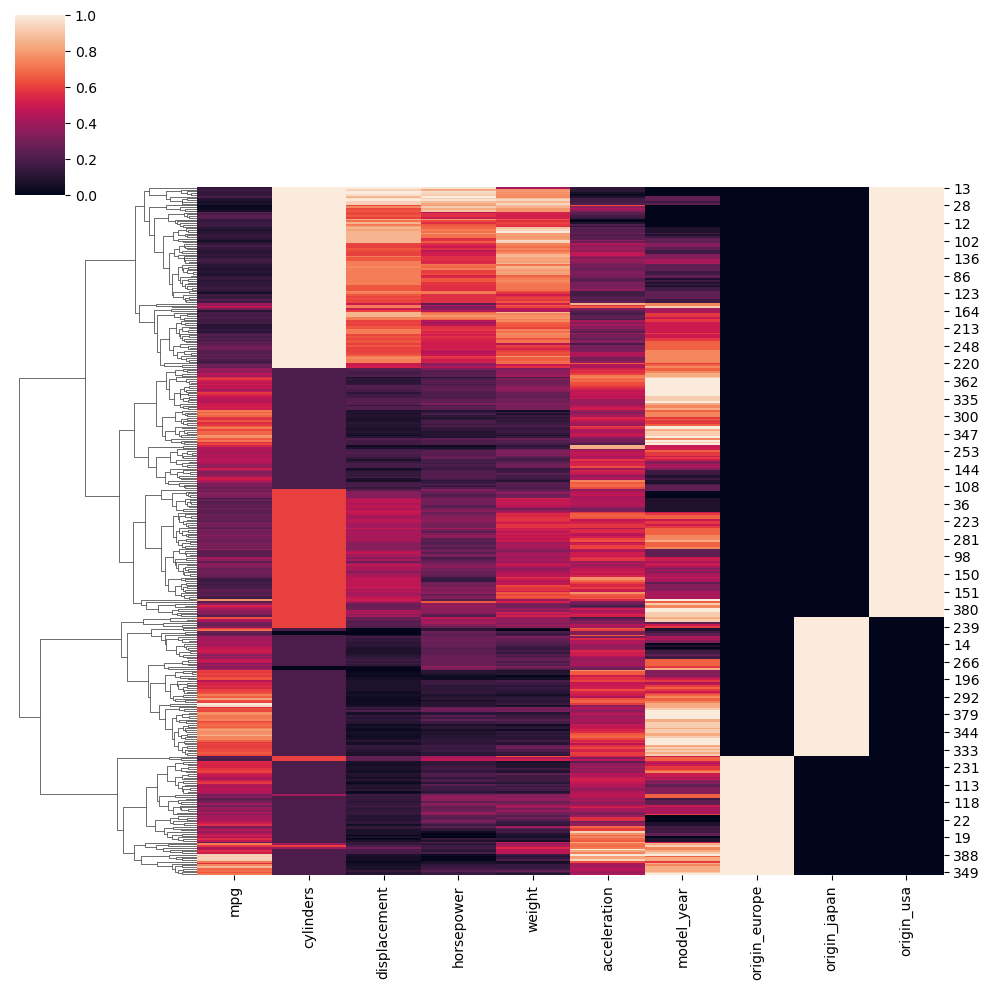

In [19]:
plt.figure(figsize=(14,8),dpi=200)
sns.clustermap(data=df_scaled,col_cluster=False)

In [20]:
from sklearn.cluster import AgglomerativeClustering

In [21]:
model = AgglomerativeClustering(n_clusters=4)

In [22]:
labels = model.fit_predict(df_scaled)

In [23]:
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 0, 0, 0, 3, 2, 2, 2,
       2, 2, 0, 1, 1, 1, 1, 3, 0, 3, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 2, 2, 2, 3, 3, 2, 0, 3, 0, 2, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 3, 1, 1, 1, 1, 2, 2, 2, 2, 0, 3, 3, 0, 3, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 1, 1, 1, 1, 0, 3, 0, 3,
       3, 0, 0, 2, 1, 1, 2, 2, 2, 2, 1, 2, 3, 1, 0, 0, 0, 3, 0, 3, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 3, 3, 0, 2, 2, 3, 3, 2, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 3, 0, 0, 0, 3, 2, 3, 0, 2, 0, 2,
       2, 2, 2, 3, 2, 2, 0, 0, 2, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 2, 3, 0,
       0, 0, 0, 2, 3, 3, 0, 2, 1, 2, 3, 2, 1, 1, 1, 1, 3, 0, 2, 0, 3, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 2, 0, 3, 0, 0, 0, 3, 2, 3, 2, 3,
       2, 0, 3, 3, 3, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 3, 3, 0, 3, 0, 0, 3, 2, 2, 2, 2, 2, 3, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 3, 0, 0, 2, 1, 2, 1, 0, 0,

<Axes: xlabel='weight', ylabel='mpg'>

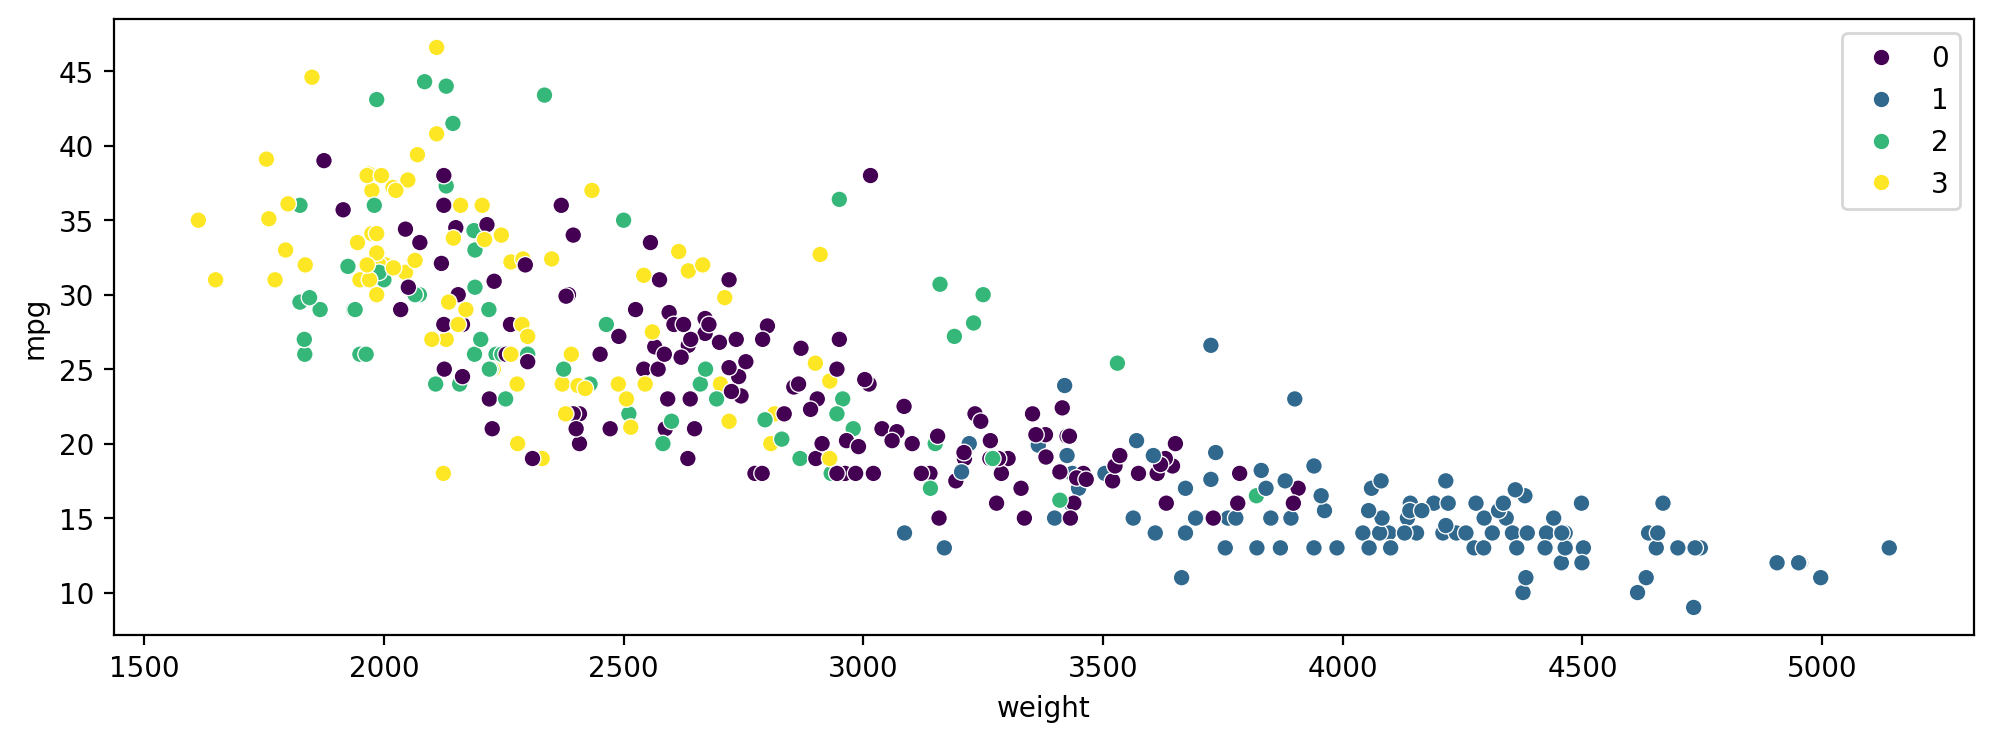

In [30]:
plt.figure(figsize=(12,4),dpi=200)
sns.scatterplot(data=df,x='weight',y='mpg',hue=labels,palette='viridis')

In [31]:
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster import hierarchy

In [32]:
linkage_matrix = hierarchy.linkage(model.children_)

In [33]:
linkage_matrix

array([[ 67.        , 161.        ,   1.41421356,   2.        ],
       [ 10.        ,  45.        ,   1.41421356,   2.        ],
       [ 47.        ,  99.        ,   1.41421356,   2.        ],
       ...,
       [340.        , 777.        ,  56.40035461, 389.        ],
       [332.        , 778.        ,  58.69412236, 390.        ],
       [349.        , 779.        ,  75.32595834, 391.        ]])

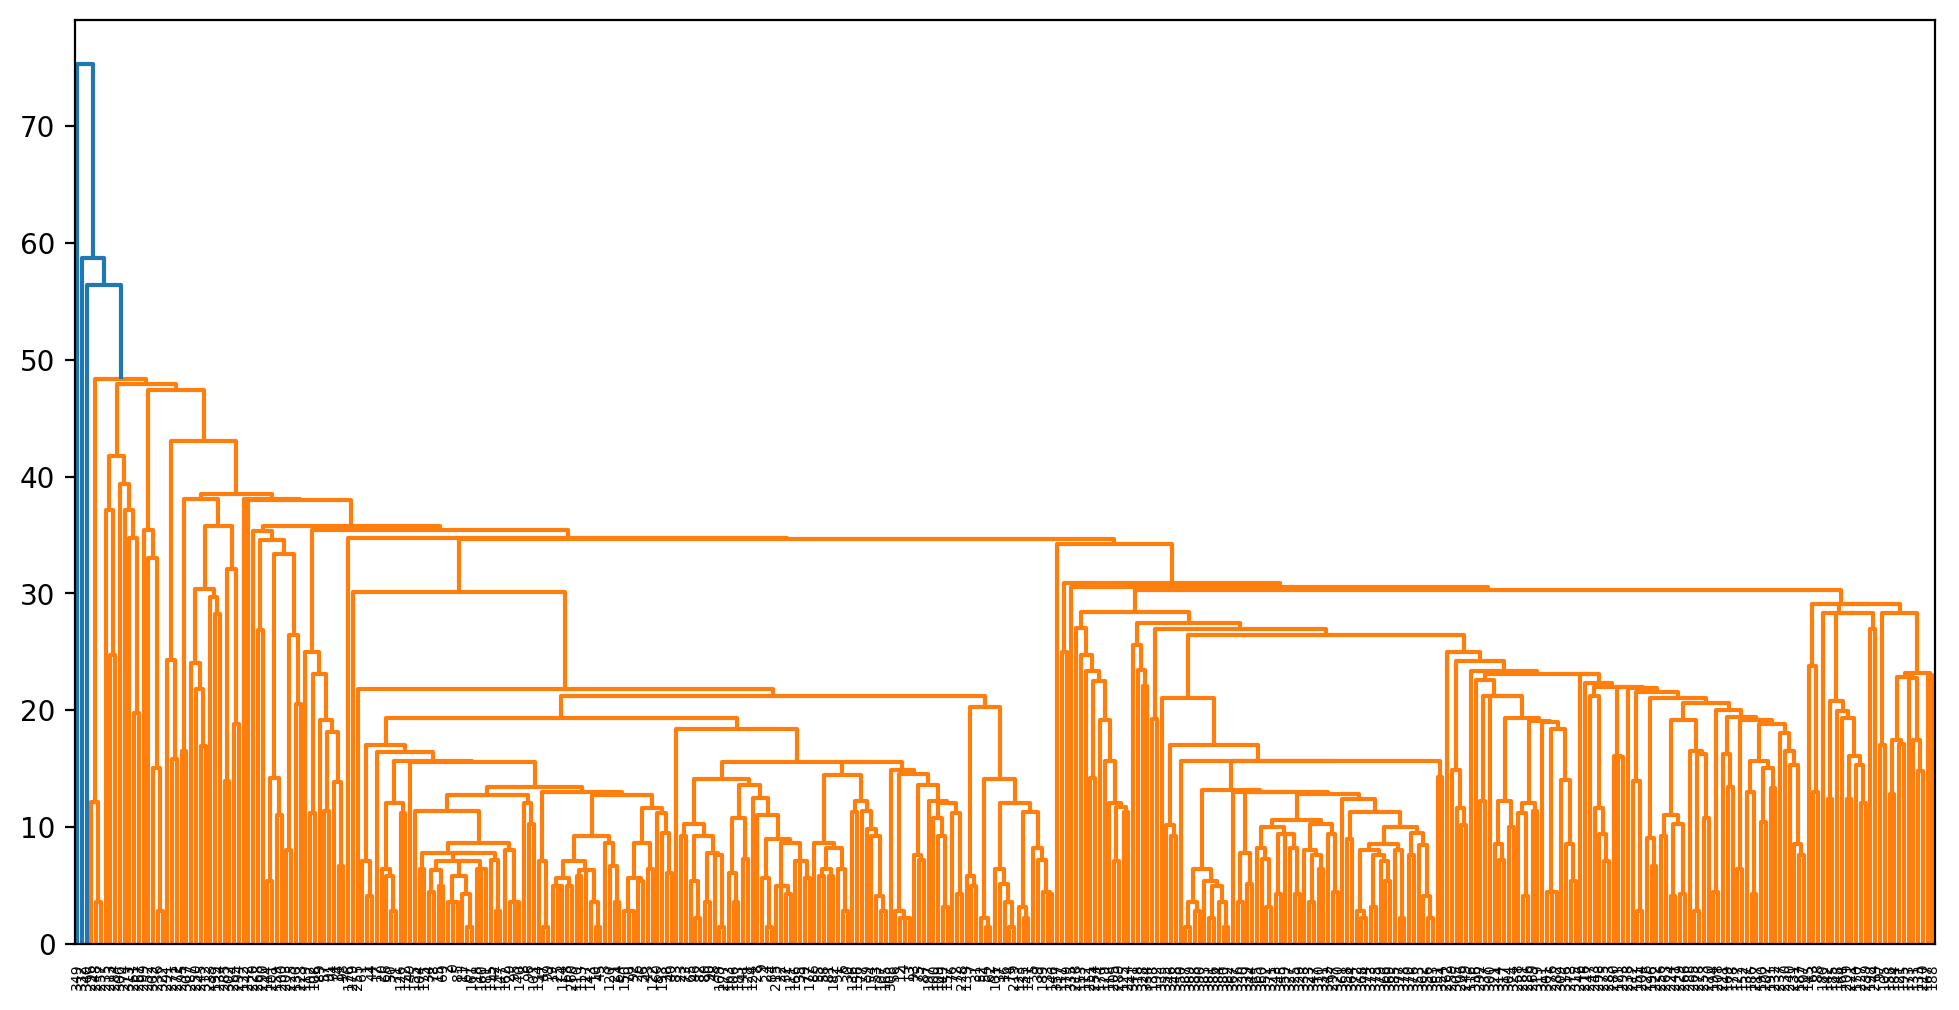

In [35]:
plt.figure(figsize=(12,6),dpi=200)
dendro = dendrogram(linkage_matrix)

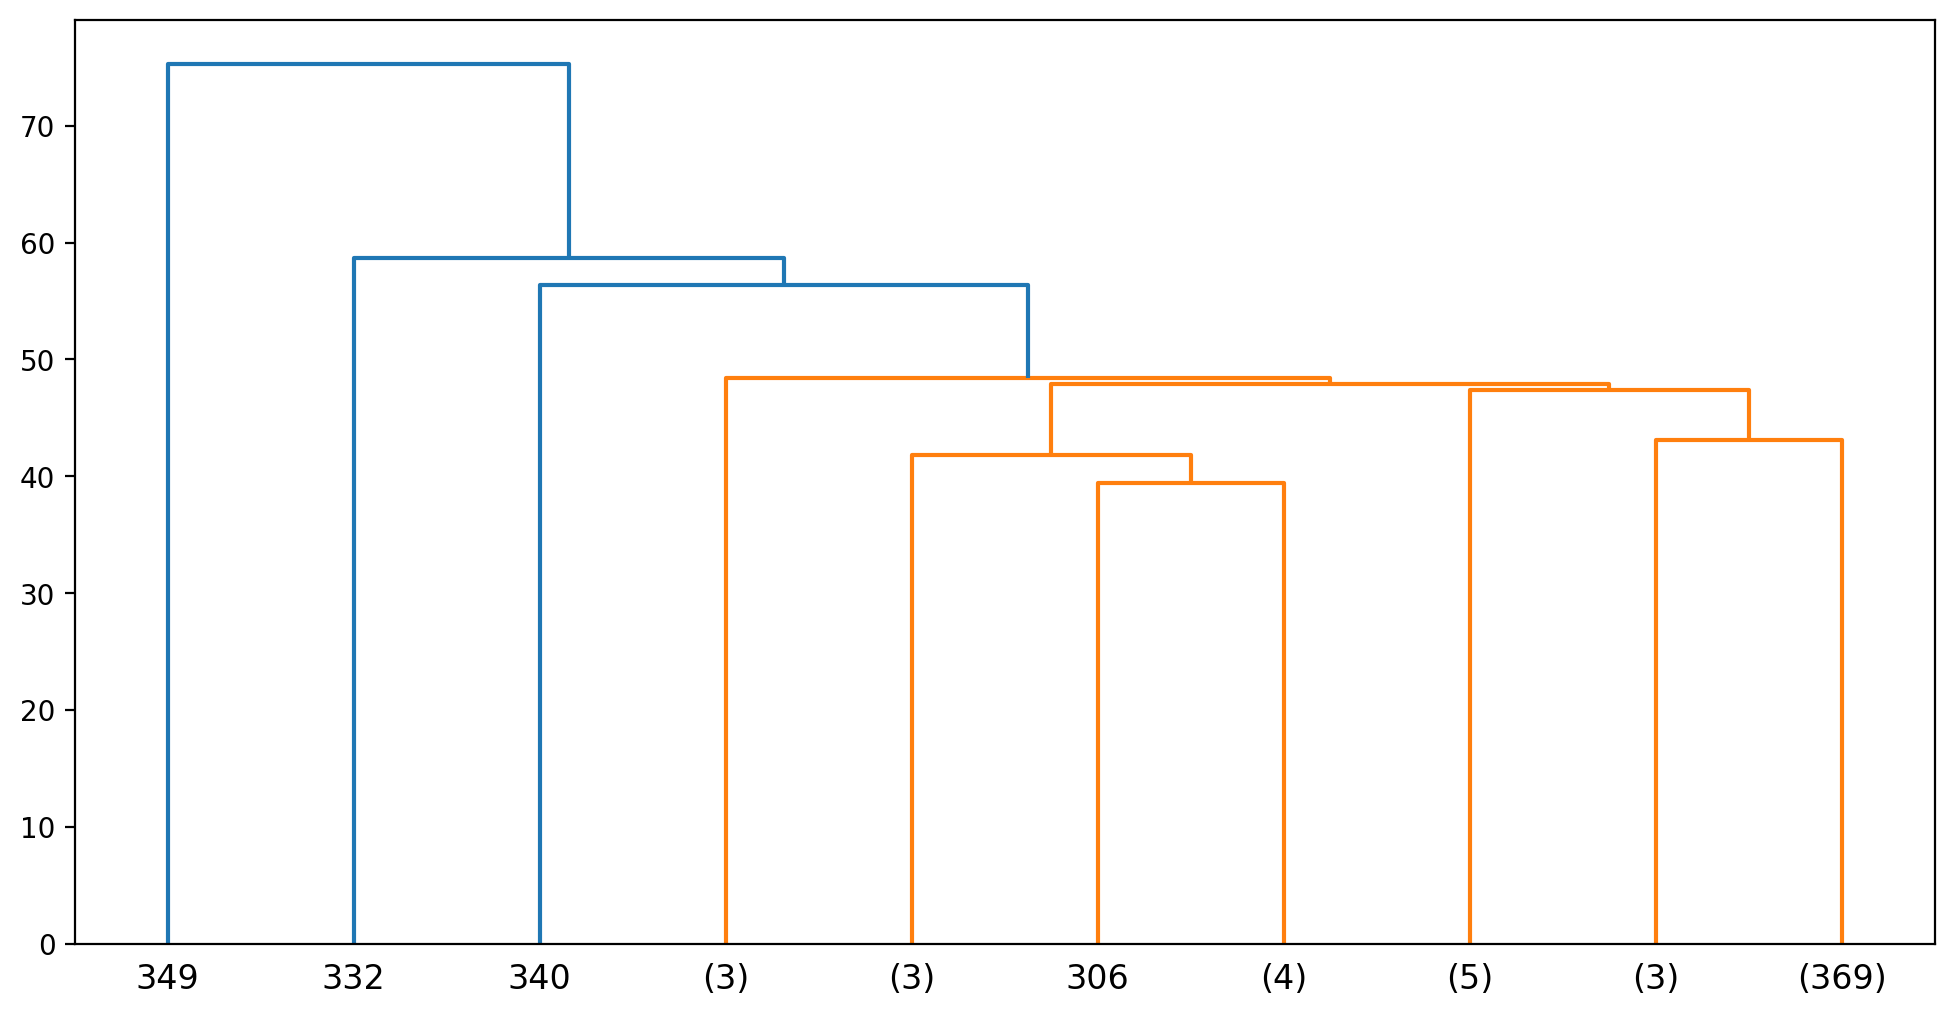

In [36]:
plt.figure(figsize=(12,6),dpi=200)
dendro = dendrogram(linkage_matrix,truncate_mode='lastp',p=10)

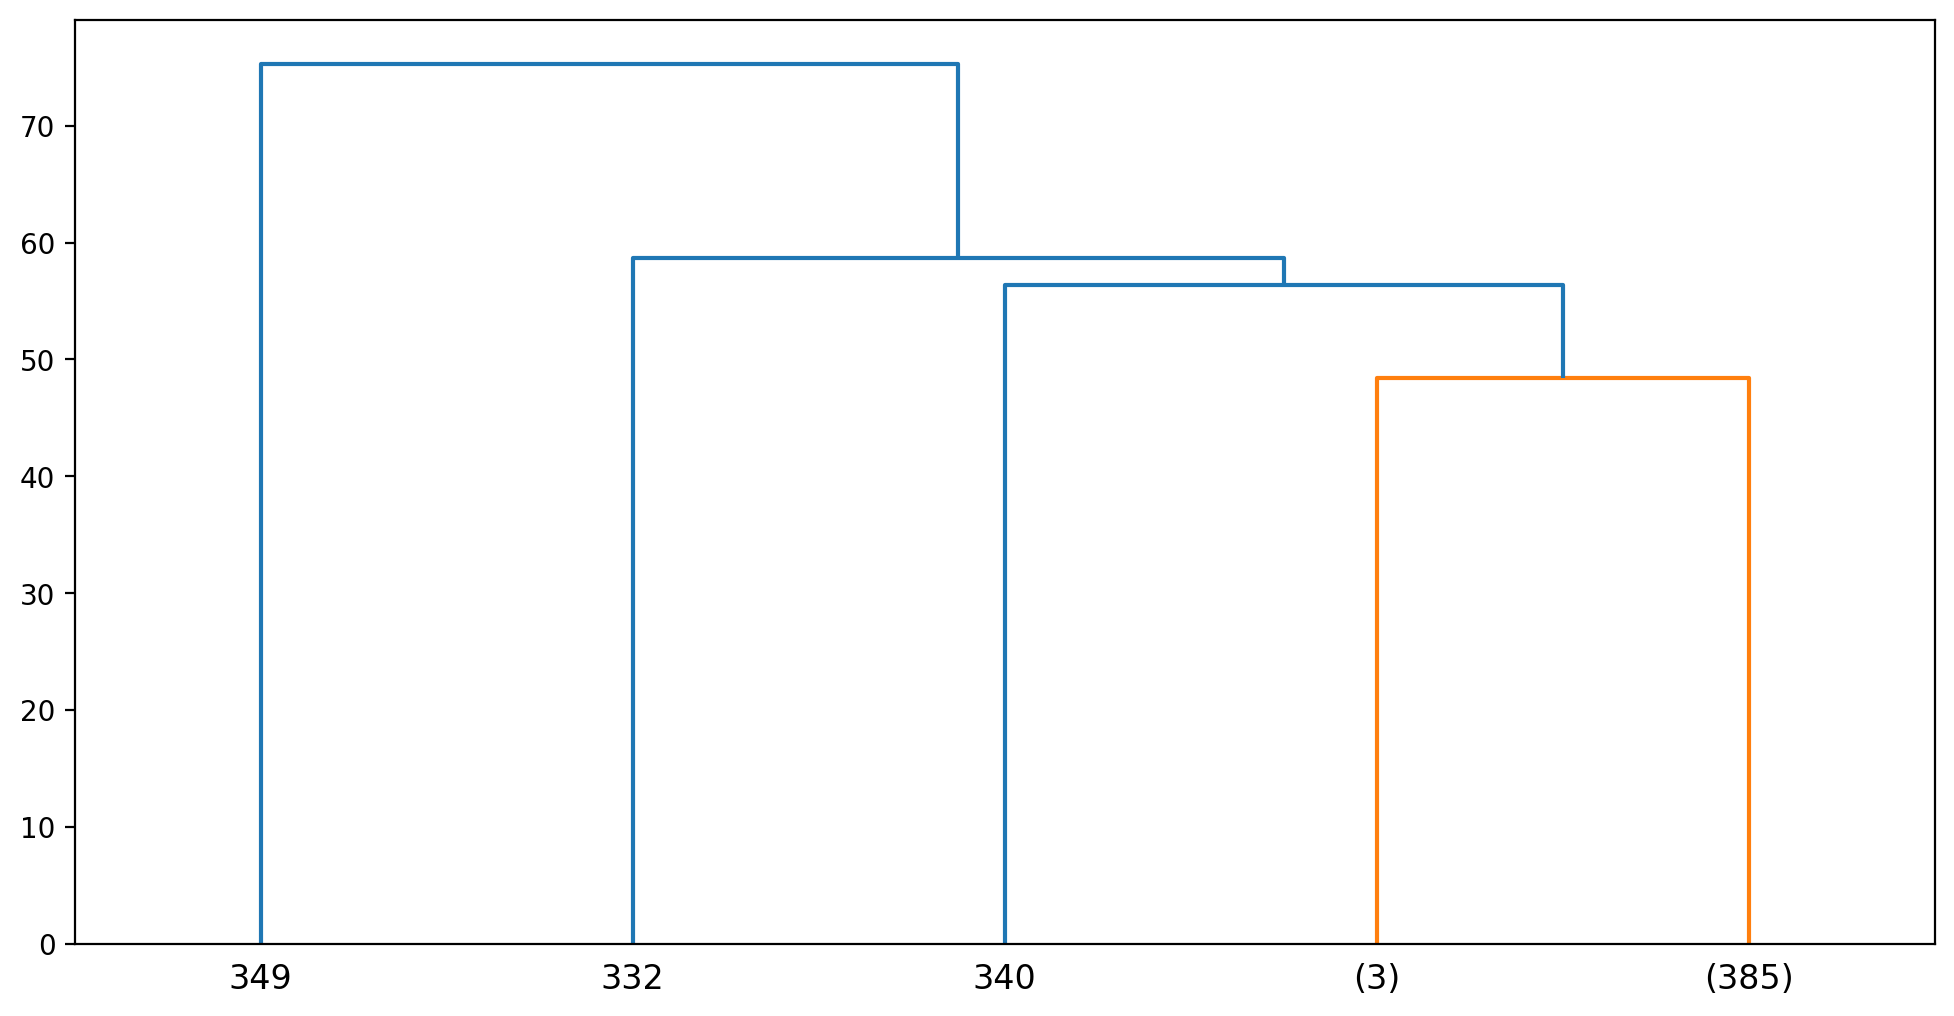

In [37]:
plt.figure(figsize=(12,6),dpi=200)
dendro = dendrogram(linkage_matrix,truncate_mode='level',p=3)

### theorytical max_distance 

In [38]:
np.sqrt(len(df_scaled.columns))

3.1622776601683795

In [39]:
df_scaled['mpg'].idxmax()

320

In [40]:
df_scaled['mpg'].idxmin()

28

In [41]:
car_a = df_scaled.iloc[320]
car_b = df_scaled.iloc[28]

In [42]:
distance = np.linalg.norm(car_a-car_b)

In [43]:
distance

2.3852929970374714